In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Outline

1. Reading the Data
2. Missing Values
3. EDA / Hypothesis Testing
4. Feature Engineering
5. Model Building and Evaluation Part 1 - Basic ML
6. Model Building and Evaluation Part 2 - Neural Networks

# 1. Reading the Data

https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

In [2]:
df = pd.read_csv('data.csv',parse_dates = [0])

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


**We have a date-time column here. We will do a couple of things here:**
1. Set the 'timestamp' as index. 
2. Extract 4 parameters from 'timestamp' (now index column) - Weekday, Month, Year and Hour and make 4 different columns out of it. 

In [4]:
df.set_index('timestamp',inplace=True)

In [5]:
#df['Date'] = df.index.date
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df['year'] = df.index.year
df['hour'] = df.index.hour

In [6]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weekday,month,year,hour
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,6,1,2015,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,6,1,2015,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,6,1,2015,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,6,1,2015,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,6,1,2015,4


# Metadata:

**1. "timestamp"** - timestamp field for grouping the data 

**2. "cnt"** - the count of a new bike shares 

**3. "t1"** - real temperature in C 

**4. "t2"** - temperature in C "feels like" 

**5. "hum"** - humidity in percentage 

**6. "windspeed"** - wind speed in km/h 

**7. "weathercode"** - category of the weather 

**8. "isholiday"** - boolean field - 1 holiday / 0 non holiday 

**9. "isweekend"** - boolean field - 1 if the day is weekend 

**10. "season"** - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


**11. "weathe_code" category description:** <br />
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity <br />
2 = scattered clouds / few clouds <br />
3 = Broken clouds <br />
4 = Cloudy <br />
7 = Rain/ light Rain shower/ Light rain <br />
10 = rain with thunderstorm <br />
26 = snowfall <br />
94 = Freezing Fog <br />

**12. "weekday"** - Day of the week. 0 representing Monday, 1 is Tuesday and so on until 6 as Sunday. 

**13. "month"** - Month of the Year

**14. "year"** - Year 

**15. "hour"** - Hour of the Day. from 0 to 23. O represents 1st hour, 23 represents the 24th hour.

# 2. Missing Values

In [7]:
df.isna().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
weekday         0
month           0
year            0
hour            0
dtype: int64

We are good here! Nothing to change.

# 3. Exploratory Data Analysis

### Here are some Questions that would give us more insight into the data we are working with:

1. People cycle more in summer than in rest of the year (Hypothesis Testing)
2. Distribution of traffic over week (day vs hour wise) - heatmap
3. Holiday vs Non-Holiday cycling activity
4. Cyling activity vs temp variation through the year
5. Wind Speeds are stronger in winter? (Hypothesis Testing)
6. How does the weather code effect cyling activity?

## People cycle more per hour in summer than per hour over the year (Hypothesis Testing)

**Null Hypothesis:** The mean cycle count per hour in summer is **equal** to the mean cycle count over the entire year <br />
**Alternative Hypothesis:** The mean cycle count per hour in summer is **more** to the mean cycle count over the entire year

Let's plot a couple of graphs to get an intuitive idea of the distribution before we get into the Hypothesis Testing.

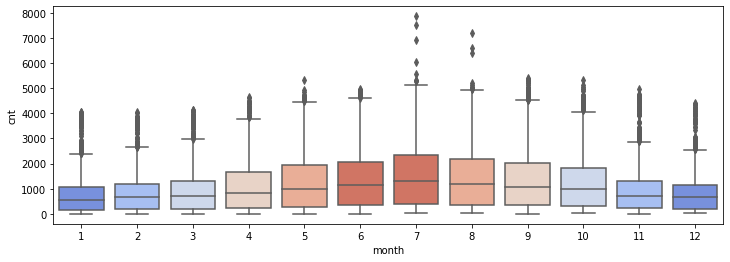

In [8]:
# Box Plot of cycle count for each month
plt.rcdefaults()
pal = sns.color_palette('coolwarm')
palette = pal.as_hex() + pal.as_hex()[::-1]

plt.figure(figsize = (12,4))
sns.boxplot(y = df.cnt, x = df.month, data = df, palette = palette)
plt.show()

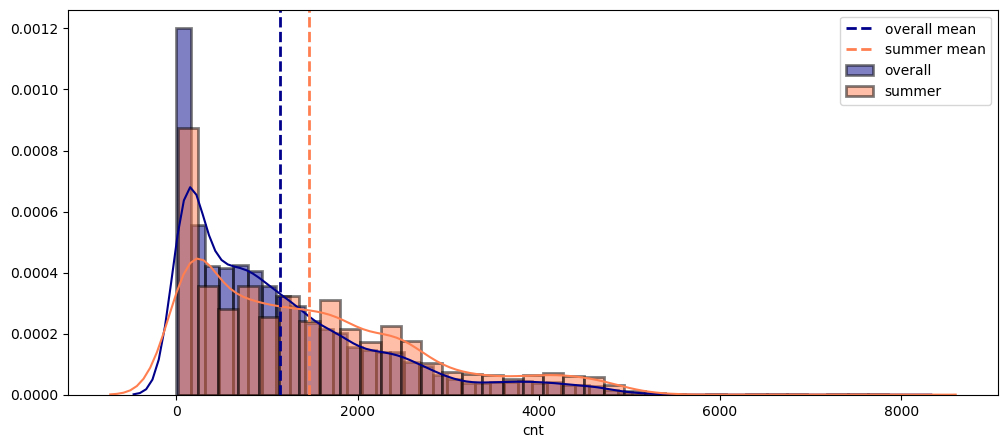

In [9]:
# Density plots (kde and histogram) for cycle counts for the summer period vs the entire year
plt.rcdefaults()
plt.figure(figsize = (12,5))
sns.distplot(df.cnt, color = 'darkblue', hist_kws = dict(edgecolor = 'k', lw = 2, alpha = 0.5), label = 'overall')
sns.distplot(df[df.season == 1].cnt, color = 'coral', hist_kws = dict(edgecolor = 'k', lw = 2, alpha = 0.5),
             label = 'summer')

plt.axvline(df.cnt.mean(), color = 'darkblue', lw = 2, linestyle='dashed', label = 'overall mean')
plt.axvline(df[df.season == 1].cnt.mean(), color = 'coral', lw = 2, linestyle='dashed', label = 'summer mean')
plt.legend()
plt.show()

### Hypothesis Testing

In [10]:
from statsmodels.stats.weightstats import ztest
import scipy.stats

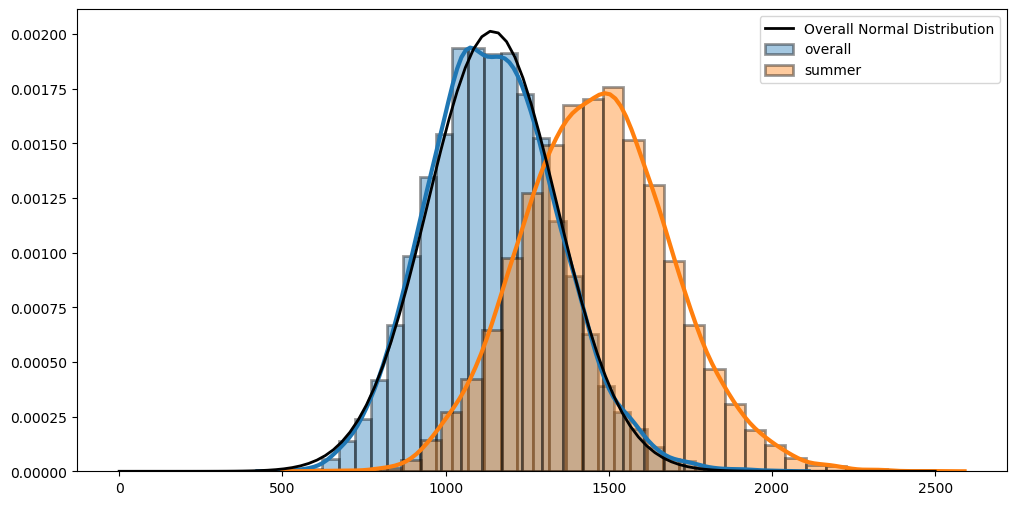

In [11]:
plt.figure(figsize = (12,6))

means = []
n = 30
for i in range(10000):
    value = df.sample(n = n).cnt.mean()
    means.append(value)
sns.distplot(means, bins = 30,hist_kws = dict(edgecolor="black", lw=2),
             kde_kws = dict(lw = 3), label = 'overall')


means_summer = []
n_summer = 30
for i in range(10000):
    value = df[df.season == 1].sample(n = n_summer).cnt.mean()
    means_summer.append(value)
sns.distplot(means_summer, bins = 30,hist_kws = dict(edgecolor="black", lw=2),
             kde_kws = dict(lw = 3), label = 'summer')


# True Normal Curve
x_min = 0.0
x_max = 2500.0
mean = df.cnt.mean()
std = df.cnt.std() / np.sqrt(n)
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x,mean,std)
plt.plot(x,y, color='black', lw = 2, label = 'Overall Normal Distribution')

plt.legend()

In [12]:
n = 30
stdev = df.cnt.std() / np.sqrt(n)

sample = df[df.season == 1].sample(n = 30)

(-df.cnt.mean() + sample.cnt.mean()) / (sample.cnt.std()/np.sqrt(n-1))

1.1524016791895884

In [13]:
z_statistic, p_value = ztest(x1 = df[df.season == 1].cnt, x2 = df.cnt, value = 0, alternative = 'larger' )

In [14]:
z_statistic, p_value 

(16.979126402819528, 5.860892736515766e-65)

In [15]:
overall = df.cnt
summer = df[df.season == 1].cnt

t_stat, p_value = scipy.stats.mstats.ttest_ind(overall,summer)

In [16]:
t_stat, p_value

(-16.979126402819528, 3.035143267062617e-64)

## Distribution of traffic over week (day vs hour wise) 

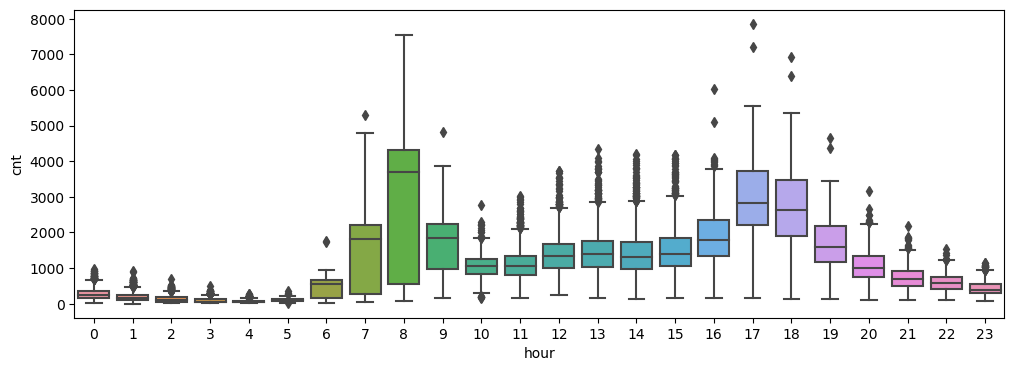

In [17]:
plt.figure(figsize = (12,4))
sns.boxplot(y = df.cnt, x = df.hour, data = df)

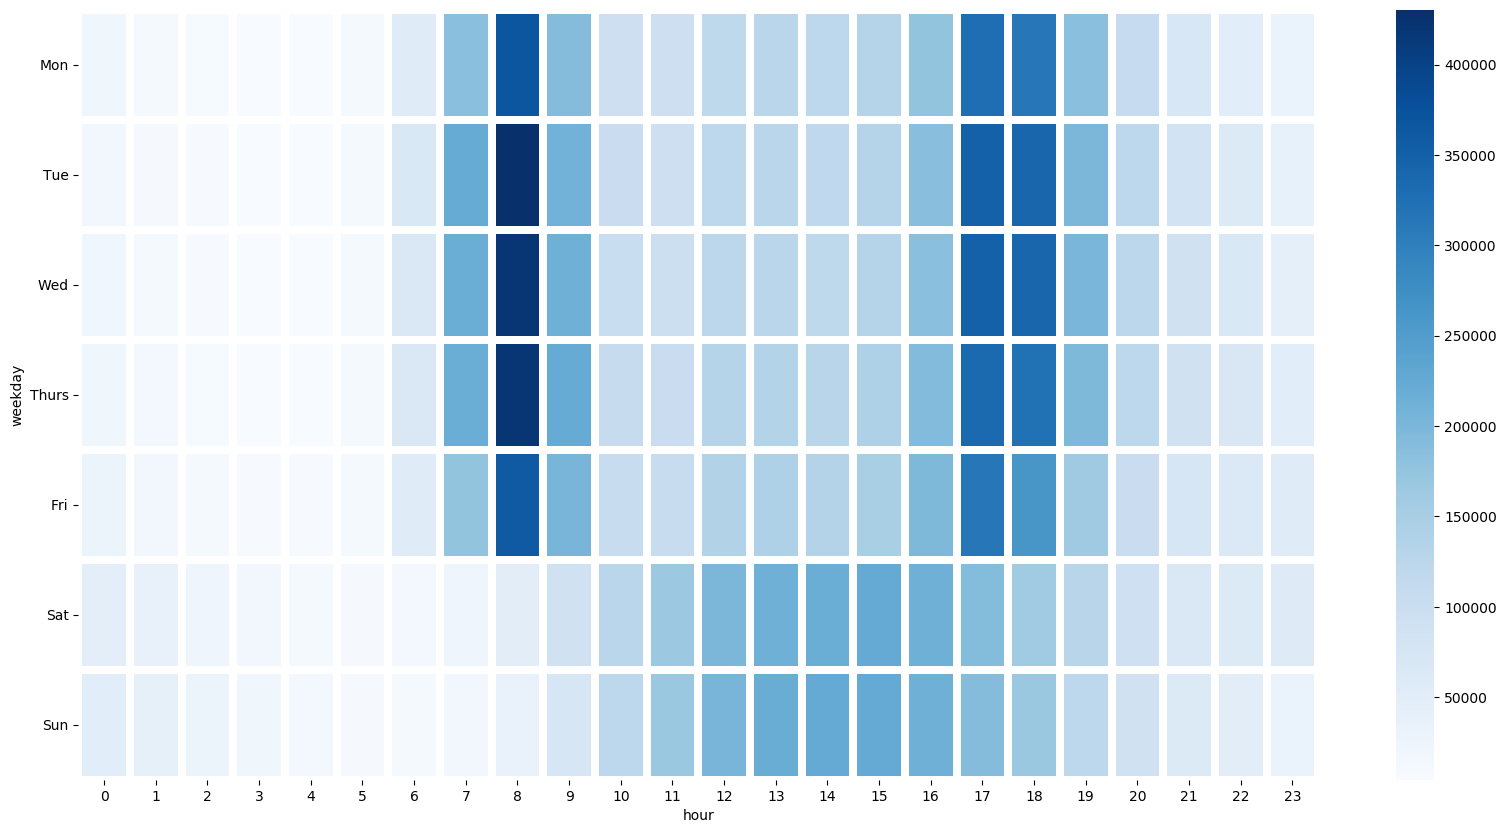

In [18]:
plt.figure(figsize = (20,10))

ylabels = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']

sns.heatmap(df.groupby(['weekday', 'hour'])['cnt'].sum().unstack(), linewidths = 5, cmap = 'Blues', 
            alpha = 1, yticklabels = ylabels )
plt.yticks(rotation = 0)

plt.show()

1. During the weekdays, the traffic is higher in the morning and evenings, which resonates with work travel timings. It also shows that a lot of people use cycles to get to work.
2. Over the weekends, people tend to cycle in the afternoon, probably for leisure. 

## Holiday vs Non-Holiday cycling activity

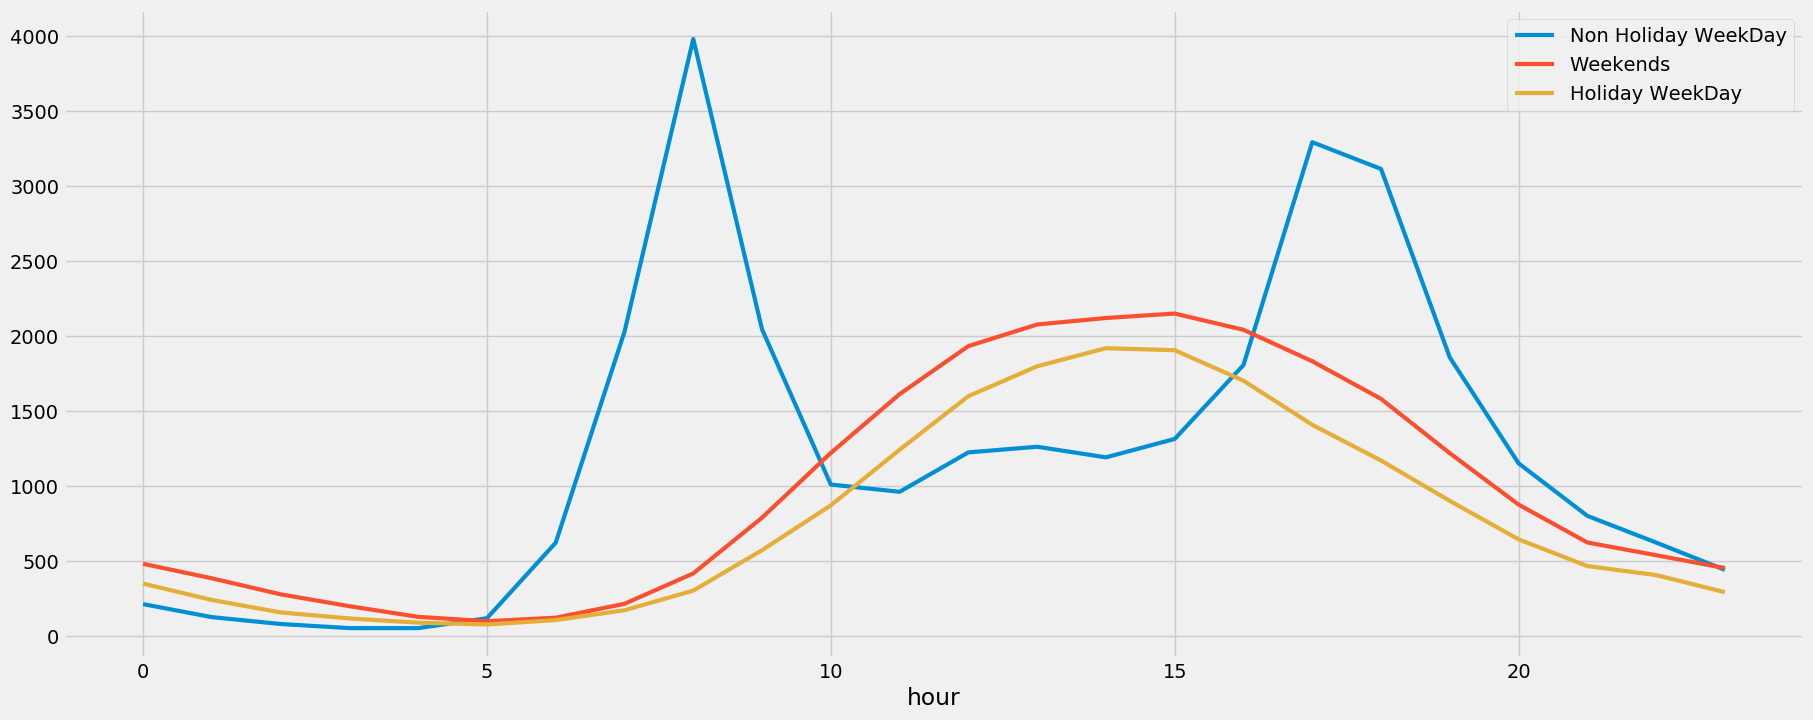

In [19]:
#plt.xkcd()
plt.rcdefaults()
plt.style.use('fivethirtyeight')

df_no_holiday = df[(df.is_holiday == 0)][df.weekday < 5]
df_no_holiday.groupby('hour')['cnt'].mean().plot(label = 'Non Holiday WeekDay', lw = 3)

df_weekend = df[df.weekday > 4]
df_weekend.groupby('hour')['cnt'].mean().plot(label = 'Weekends', lw = 3)

df_holiday = df[df.is_holiday == 1]
df_holiday.groupby('hour')['cnt'].mean().plot(label= 'Holiday WeekDay', figsize = (20,8), lw = 3)

plt.legend()
plt.show()

The distribution between the Weekday and weekends is consistent with the heatmap plotted above. Here we can also see and verify the cycling habits or people during weekends is the same as cycling habits during any other public holiday.

## Cyling activity vs temp variation through the year

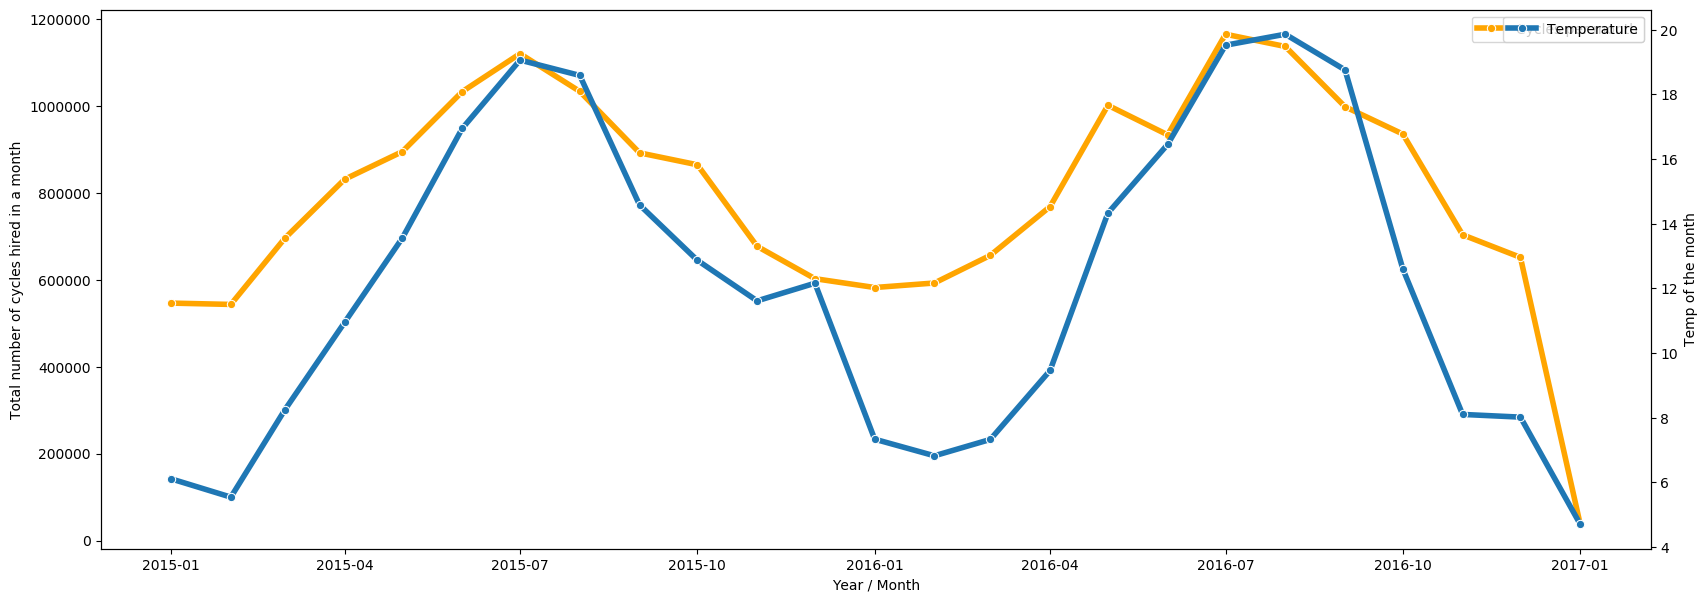

In [20]:
plt.rcdefaults()
datetime = []
multiindex = (df.groupby(['year','month'])['cnt'].sum().index)
for tup in multiindex:
    datetime.append('{}/{}'.format(tup[0],tup[1]))
year_month_ax = pd.to_datetime(datetime)
year_month_ax


fig, ax = plt.subplots(figsize = (20,7))

l1 = sns.lineplot(x = year_month_ax, y = df.groupby(['year','month'])['cnt'].sum(), 
             ax = ax, marker = 'o',color = 'orange', label= 'Cycles per month', lw = 4)
ax.set_xlabel('Year / Month')
ax.set_ylabel('Total number of cycles hired in a month')

ax2 = ax.twinx()
l2 = sns.lineplot(x = year_month_ax, y = df.groupby(['year','month'])['t1'].mean(),
             ax = ax2, marker = 'o', label = 'Temperature', lw = 4)
ax2.set_ylabel('Temp of the month')


plt.show()

## Wind Speeds vs Seasons

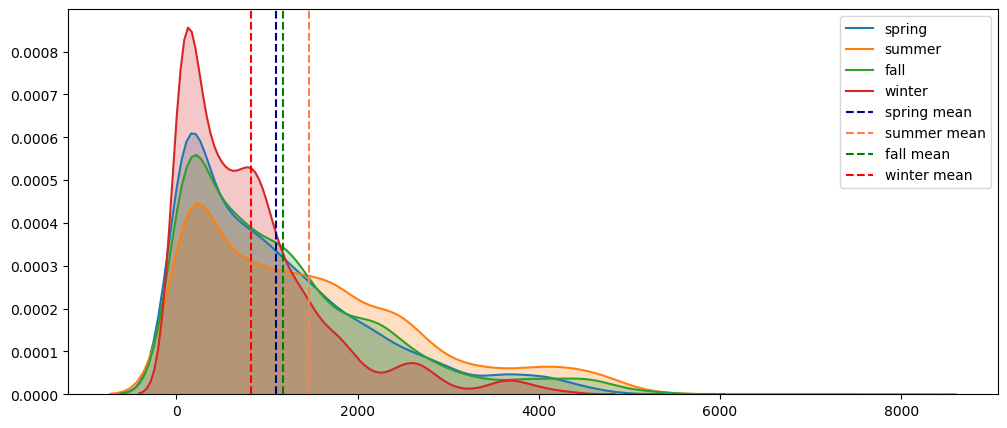

In [21]:
plt.rcdefaults()
plt.figure(figsize = (12,5))
sns.kdeplot(df[df.season == 0.0].cnt, label = 'spring', shade =True)
sns.kdeplot(df[df.season == 1.0].cnt, label = 'summer', shade =True)
sns.kdeplot(df[df.season == 2.0].cnt, label = 'fall', shade =True)
sns.kdeplot(df[df.season == 3.0].cnt, label = 'winter',shade =True)

plt.axvline(df[df.season == 0.0].cnt.mean(), label = 'spring mean', linestyle = 'dashed', color = 'darkblue')
plt.axvline(df[df.season == 1.0].cnt.mean(), label = 'summer mean', linestyle = 'dashed', color = 'coral')
plt.axvline(df[df.season == 2.0].cnt.mean(), label = 'fall mean', linestyle = 'dashed', color = 'green')
plt.axvline(df[df.season == 3.0].cnt.mean(), label = 'winter mean', linestyle = 'dashed', color = 'red')

plt.legend()
plt.show()

## How does the weather code effect cyling activity?

Weather Code is assigned for every hour of every day. We will look at the average counts of cycles rented for the hours that were marked with a certain weather code. 

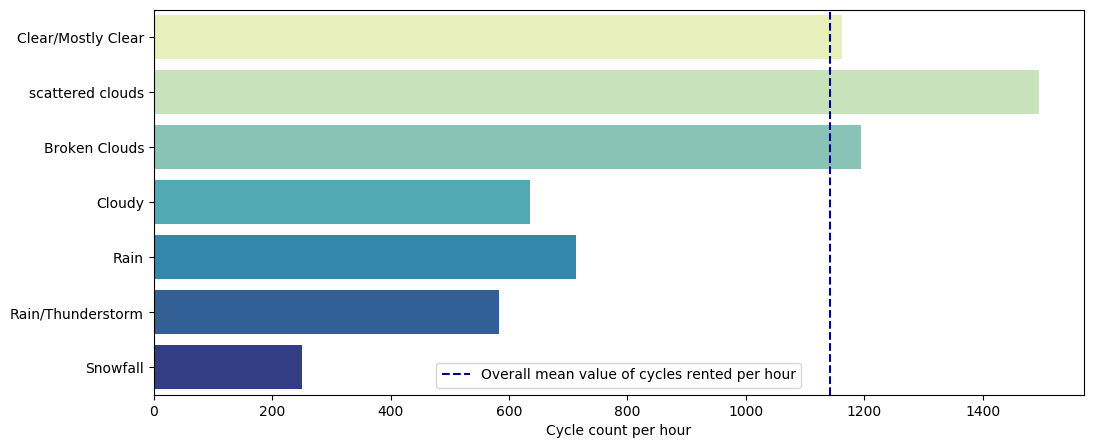

In [22]:
plt.rcdefaults()
plt.figure(figsize = (12,5))
sns.barplot(x = df.groupby('weather_code').cnt.mean().values.tolist(), palette = 'YlGnBu', 
           y = ['Clear/Mostly Clear','scattered clouds','Broken Clouds','Cloudy', 'Rain','Rain/Thunderstorm','Snowfall'])

plt.axvline(df.cnt.mean(), label = 'Overall mean value of cycles rented per hour', color = 'darkblue', linestyle='dashed')
plt.xlabel('Cycle count per hour')
plt.legend()

# 4. Feature Engineering 

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

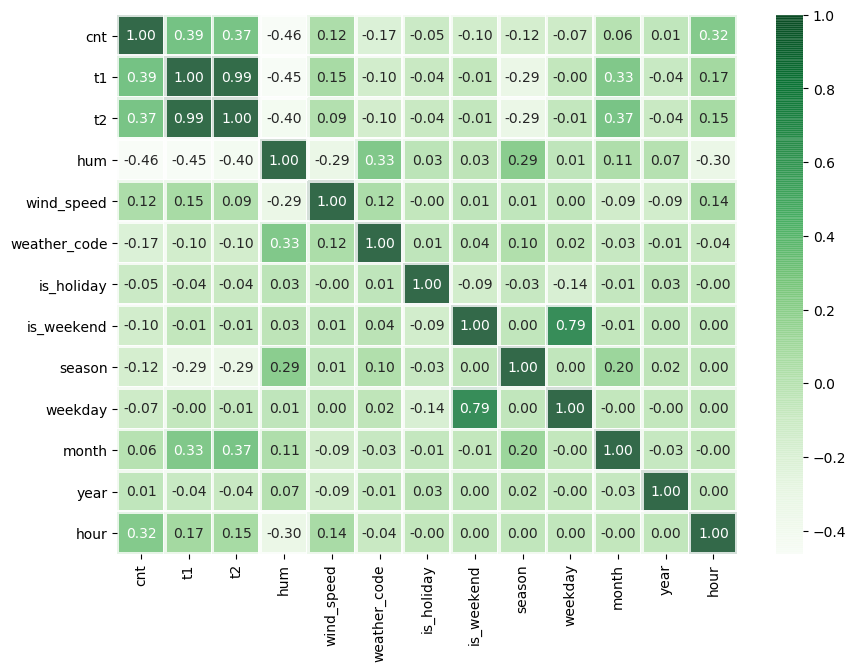

In [24]:
plt.rcdefaults()
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), cmap ='Greens', lw = 2, annot = True, fmt = '.2f', alpha = 0.8)

### One Hot Encoding

In [25]:
df_onehot = df.copy() # duplicated df for onehot encoding

for column in ['weather_code','season','weekday','month','hour']:
    df_onehot.loc[:,column] = df_onehot[column].apply(lambda x: column + str(x))

for column in ['weather_code','season','weekday','month','year','hour']:
    df_onehot = pd.concat((df_onehot, pd.get_dummies(df_onehot[column])), axis = 1)
    df_onehot.drop(column, 1, inplace = True)

In [26]:
df_onehot.shape

(17414, 64)

# 5. Model Building

In [27]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

### Model Types:
**Model 1:** Original Data based <br />
**Model 2:** One hot encoded features

# Model 1

### Feature Scaling for Model 1 (Orginal Features)

In [28]:
X = df.drop(['cnt','t2'],1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train.shape

(13931, 11)

### Building Model 1: Part 1 - Ensemble ML Technique (XGBoost)

In [30]:
model1 = XGBRegressor(n_estimators = 500, max_depth = 8, n_jobs = -1)

model1.fit(X_train, y_train)

pred1 = model1.predict(X_test)

print('R2 Score is', r2_score(y_test, pred1))
print('RMSE on is', np.sqrt(mean_squared_error(y_test, pred1)))

R2 Score is 0.9616524535117398
RMSE on is 214.23306792747925


In [31]:
# Predictions Comparision
performance = pd.DataFrame()
performance['actual'] = y_test[:15].values
performance['predicted'] = model1.predict(X_test[:15])
performance['abs diff'] = performance['actual'] - performance['predicted']
performance['rel diff'] = np.round(((performance['actual'] - performance['predicted']) / performance['actual']) * 100, 2)

performance

,actual,predicted,abs diff,rel diff
0,705,745.105408,-40.105408,-5.69
1,958,947.768494,10.231506,1.07
2,497,477.310089,19.689911,3.96
3,1392,1337.803711,54.196289,3.89
4,3073,2738.513672,334.486328,10.88
5,2190,2123.090576,66.909424,3.06
6,138,120.976204,17.023796,12.34
7,1350,970.953125,379.046875,28.08
8,1845,1854.647217,-9.647217,-0.52
9,1705,1549.453369,155.546631,9.12


### Feature Importance | Model 1 - XGBoost

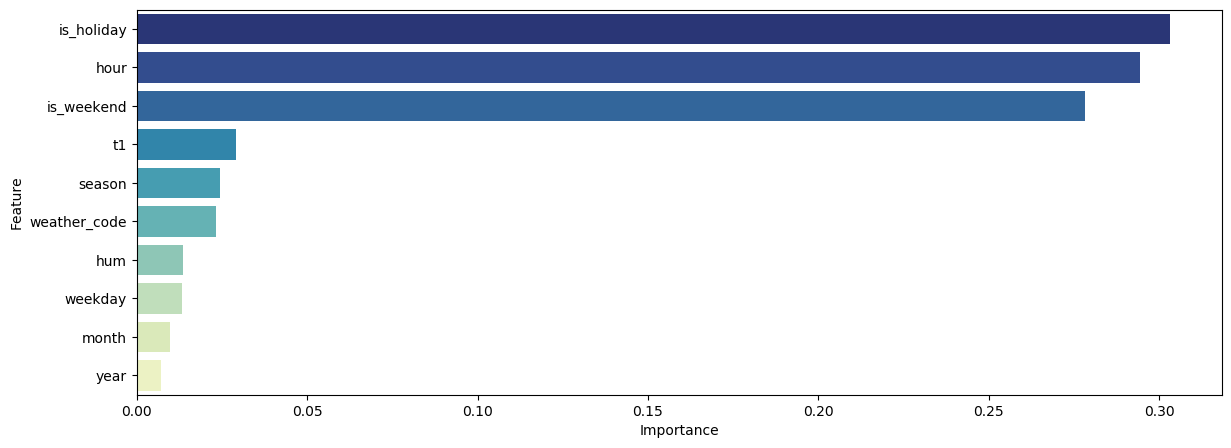

In [32]:
feature_imp = pd.DataFrame()
feature_imp['Feature'] = X.columns
feature_imp['Importance'] = model1.feature_importances_
feature_imp = feature_imp.sort_values(by = 'Importance', ascending = False)


plt.figure(figsize = (14,5))
sns.barplot(x = feature_imp.Importance[:10] , y = feature_imp.Feature[:10], palette = 'YlGnBu_r')
plt.show()

### Building Model 1: Part 2 - Artifical Neural Networks

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import Adam, RMSprop
import time

In [34]:
model1_nn = Sequential([
    Dense(units = 256, input_shape = (11,)),
    Activation('relu'),
    Dense(units = 128),
    Activation('relu'),
    Dense(units = 64),    
    Activation('relu'),
    Dense(units = 1)
])

In [35]:
model1_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3072      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

In [36]:
model1_nn.compile(optimizer = Adam(lr= 0.001), loss = 'mean_squared_error')

In [37]:
t0 = time.time()
hitory1_nn1 = model1_nn.fit(X_train, y_train, batch_size = 1000, epochs = 300, verbose = 0, validation_split = 0.2)
t1 = time.time()

print('Time taken:',(t1 - t0))

Time taken: 30.686928033828735


In [38]:
model1_nn.compile(optimizer = Adam(lr= 0.0005), loss = 'mean_squared_error')

In [39]:
t0 = time.time()
history1_nn2 = model1_nn.fit(X_train, y_train, batch_size = 500, epochs = 4000, verbose = 0, validation_split = 0.2)
t1 = time.time()

print('Time taken:',(t1 - t0))

Time taken: 449.84575939178467


In [40]:
pred1_nn = model1_nn.predict(X_test)
print('R2 Score on non-one hot coded DataSet:', r2_score(y_test, pred1_nn))
print('RMSE on non-one hot coded DataSet:', np.sqrt(mean_squared_error(y_test, pred1_nn)))

R2 Score on non-one hot coded DataSet: 0.9540123854889567
RMSE on non-one hot coded DataSet: 234.6054825249906


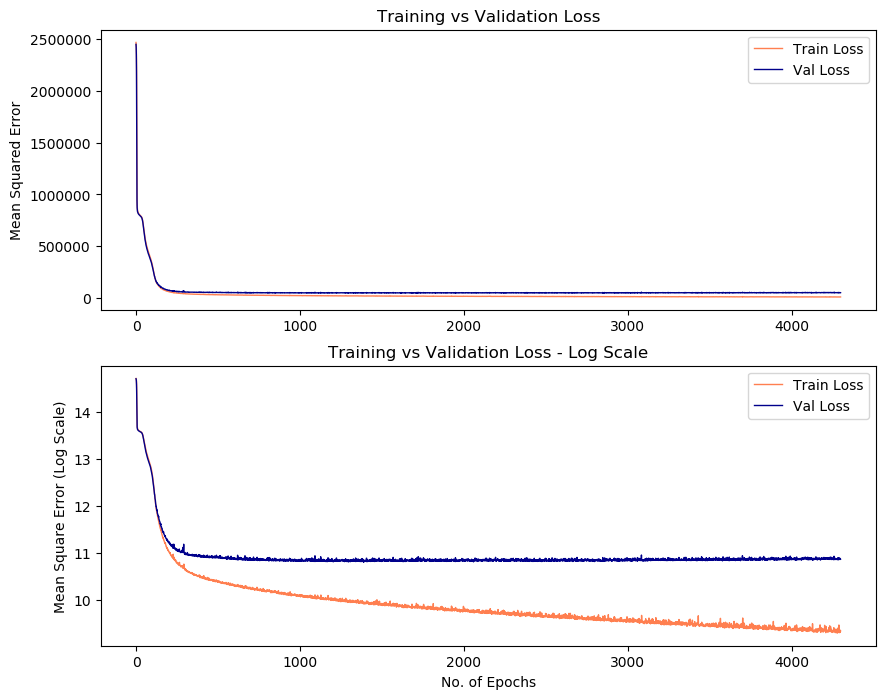

In [41]:
fig, ax = plt.subplots(2,1,figsize = (10,8))

epochs = list(range(4300))

all_loss = hitory1_nn1.history['loss'] + history1_nn2.history['loss']
all_val_loss = hitory1_nn1.history['val_loss'] + history1_nn2.history['val_loss']

sns.lineplot(x = epochs, y = (all_loss), color = 'coral', lw = 1, label = 'Train Loss', ax = ax[0])
sns.lineplot(x = epochs, y = (all_val_loss), color = 'darkblue', lw = 1, label = 'Val Loss', ax = ax[0])

sns.lineplot(x = epochs, y = np.log(all_loss), color = 'coral', lw = 1, label = 'Train Loss', ax = ax[1])
sns.lineplot(x = epochs, y = np.log(all_val_loss), color = 'darkblue', lw = 1, label = 'Val Loss', ax = ax[1])

ax[0].set_title('Training vs Validation Loss')
ax[1].set_title('Training vs Validation Loss - Log Scale')

ax[0].set_ylabel('Mean Squared Error')
plt.xlabel('No. of Epochs')
plt.ylabel('Mean Square Error (Log Scale)')

plt.show()

In [42]:
performance_nn = pd.DataFrame()
performance_nn['actual'] = y_test[:15].values
performance_nn['predicted'] = model1_nn.predict(X_test[:15])
performance_nn['abs diff'] = performance_nn['actual'] - performance_nn['predicted']
performance_nn['rel diff'] = np.round(((performance_nn['actual'] - performance_nn['predicted']) / performance_nn['actual']) * 100, 2)

performance_nn

,actual,predicted,abs diff,rel diff
0,705,495.274323,209.725677,29.75
1,958,915.804016,42.195984,4.40
2,497,480.321869,16.678131,3.36
3,1392,1306.185303,85.814697,6.16
4,3073,2413.625732,659.374268,21.46
5,2190,1869.074341,320.925659,14.65
6,138,186.662582,-48.662582,-35.26
7,1350,1143.478638,206.521362,15.30
8,1845,2261.695801,-416.695801,-22.59
9,1705,1545.373291,159.626709,9.36


### Key Take-aways from building Model 1

1. Accuracy is better for when count of cycles rented per hour is higher

# Model 2

### Feature Scaling for Model 2: One Hot encoded Features

In [43]:
X = df_onehot.drop(['cnt','t2'],1)
y = df_onehot['cnt']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train.shape

(13931, 62)

### Building Model 2: Part 1 - Ensemble ML Technique (XGBoost)

In [45]:
model2 = XGBRegressor(n_estimators = 500, max_depth = 8, n_jobs = -1)

model2.fit(X_train, y_train)

pred2 = model2.predict(X_test)

print('R2 Score is', r2_score(y_test, pred1))
print('RMSE on is', np.sqrt(mean_squared_error(y_test, pred1)))

R2 Score is 0.9616524535117398
RMSE on is 214.23306792747925


In [46]:
# Predictions Comparision
performance = pd.DataFrame()
performance['actual'] = y_test[:15].values
performance['predicted'] = model2.predict(X_test[:15])
performance['abs diff'] = performance['actual'] - performance['predicted']
performance['rel diff'] = np.round(((performance['actual'] - performance['predicted']) / performance['actual']) * 100, 2)

performance

,actual,predicted,abs diff,rel diff
0,705,571.307617,133.692383,18.96
1,958,996.482422,-38.482422,-4.02
2,497,606.640686,-109.640686,-22.06
3,1392,1400.806152,-8.806152,-0.63
4,3073,2907.411377,165.588623,5.39
5,2190,2082.428955,107.571045,4.91
6,138,163.693665,-25.693665,-18.62
7,1350,600.540283,749.459717,55.52
8,1845,2040.484131,-195.484131,-10.60
9,1705,1416.398438,288.601562,16.93


### Building Model 2: Part 2 - Artifical Neural Networks

In [47]:
model2_nn = Sequential([
    Dense(units = 64, input_shape = (62,)),
    Activation('relu'),
    Dense(units = 64),
    Activation('relu'),
    Dense(units = 64),    
    Activation('relu'),
    Dense(units = 1)
])

In [48]:
model2_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                4032      
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [49]:
model2_nn.compile(optimizer = RMSprop(lr= 0.001), loss = 'mean_squared_error')

In [50]:
t0 = time.time()
history2_nn1 = model2_nn.fit(X_train, y_train, batch_size = 1000, epochs = 1000, verbose = 0, validation_split = 0.2)
t1 = time.time()

print('Time taken:',(t1 - t0))

Time taken: 60.8616828918457


In [51]:
model2_nn.compile(optimizer = RMSprop(lr= 0.0001), loss = 'mean_squared_error')

In [52]:
t0 = time.time()
history2_nn2 = model2_nn.fit(X_train, y_train, batch_size = 1000, epochs = 1000, verbose = 0, validation_split = 0.2)
t1 = time.time()

print('Time taken:',(t1 - t0))

Time taken: 59.359086751937866


In [53]:
pred2_nn = model2_nn.predict(X_test)
print('R2 Score on one hot coded DataSet:', r2_score(y_test, pred2_nn))
print('RMSE on one hot coded DataSet:', np.sqrt(mean_squared_error(y_test, pred2_nn)))

R2 Score on one hot coded DataSet: 0.9458398511118068
RMSE on one hot coded DataSet: 254.59955523433203


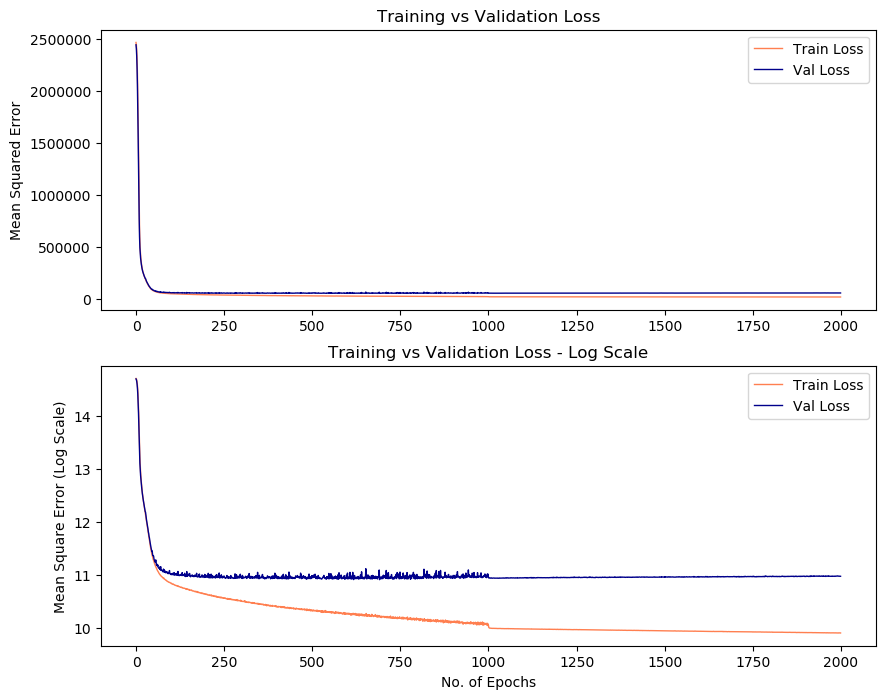

In [54]:
fig, ax = plt.subplots(2,1,figsize = (10,8))

epochs = list(range(2000))

all_loss = history2_nn1.history['loss'] + history2_nn2.history['loss']
all_val_loss = history2_nn1.history['val_loss'] + history2_nn2.history['val_loss']

sns.lineplot(x = epochs, y = (all_loss), color = 'coral', lw = 1, label = 'Train Loss', ax = ax[0])
sns.lineplot(x = epochs, y = (all_val_loss), color = 'darkblue', lw = 1, label = 'Val Loss', ax = ax[0])

sns.lineplot(x = epochs, y = np.log(all_loss), color = 'coral', lw = 1, label = 'Train Loss', ax = ax[1])
sns.lineplot(x = epochs, y = np.log(all_val_loss), color = 'darkblue', lw = 1, label = 'Val Loss', ax = ax[1])

ax[0].set_title('Training vs Validation Loss')
ax[1].set_title('Training vs Validation Loss - Log Scale')

ax[0].set_ylabel('Mean Squared Error')
plt.xlabel('No. of Epochs')
plt.ylabel('Mean Square Error (Log Scale)')

plt.show()

# Conclusions:

1. So far, XGBoost performs better than ANN on both - one hot and non one hot coded features. However the difference in RMSE or R2 Score is small. 
2. ANN models have had hypermeters tuned (Layers, neurons, activation functions and optimizers). Though it is quite possible to come up with a ANN network that surpasses XGBoost's performance.
3. I will re-build the model with in future and try to achieve much better performance. 
4. Irrespective of the ANN or XGBoost, we have a solid R2 Score of > 0.95. One observation from the prediction comparision is that, the preictions have higher error for examples with low cycle count. This could probably be cause these exmaples have more noise than underlying trend.
5. The next iteration of this project and notebook, will also work on time series analysis, to see if we can predict future cycle counts accurately.